### EDA Project - Boilerplate code
##### TODO : Change Features and Model

### Imports

In [1]:
from tqdm import tqdm
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

### Constants

In [2]:
PATH_TRAIN = "datasets/train.csv"
PATH_VALID = "datasets/validation.csv"

### Read data

In [3]:
data_train = pd.read_csv(PATH_TRAIN)
data_valid = pd.read_csv(PATH_VALID)

# Separate features (X) and target variable (y)
y_train = data_train['Pret']
X_train = data_train.drop('Pret', axis=1)

y_valid = data_valid['Pret']
X_valid = data_valid.drop('Pret', axis=1)

print(X_train.head())

                     Versiune  Vechime      Km  Putere  Capacitate cilindrica  \
0          D4 AWD Inscription      6.0  124000     190                   1969   
1      109 CDI Extralung Mixt      5.0   36000      90                   1461   
2  1.6 BlueHDi FAP STT Active      8.0  219000     120                   1560   
3      2.2 CRDi 2WD Signature      4.0   51500     202                   2151   
4                  1.8 TSI FR     11.0  228300     160                   1798   

           Marca     Model Combustibil     Transmisie Norma de poluare  \
0          Volvo     XC 60      Diesel  4x4 (automat)           Euro 6   
1  Mercedes-Benz     Citan      Diesel           Fata           Euro 6   
2        Peugeot       308      Diesel           Fata           Euro 6   
3        Hyundai  Santa Fe      Diesel           Fata           Euro 6   
4           Seat      Leon     Benzina           Fata           Euro 5   

  Cutie de viteze Tip Caroserie Optiuni culoare Tara de origine     

### Features - TODO : play with ths

In [4]:
numeric_features = ["Km", "Vechime", "Capacitate cilindrica", "Putere"]
categorical_features = ["Marca", "Model", "Versiune", "Combustibil", "Transmisie", "Norma de poluare", "Tip Caroserie", "Cutie de viteze", "Stare", "Tara de origine", "Optiuni culoare"]


### Preprocessor

In [5]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Model - TODO : play with this

In [6]:
hidden_layer_sizes = (50)
learning_rate_init = 0.01


# Define the regressor
regressor = MLPRegressor(hidden_layer_sizes = hidden_layer_sizes, learning_rate_init = learning_rate_init, max_iter = 10000000, random_state = 18, verbose=False)

print(X_train.shape[1])
print(preprocessor.fit_transform(X_train).shape[1])

print(preprocessor.fit_transform(X_train).shape[1], hidden_layer_sizes, 1)

15
3126
3126 50 1


In [7]:
PATH_PLOTS = f"plots_MLPRegressor_hidden_layer_sizes_{hidden_layer_sizes}_learning_rate_init_{learning_rate_init}"
os.makedirs(PATH_PLOTS, exist_ok=True)

### Model Pipeline

In [8]:
# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

### Train

In [9]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Km', 'Vechime',
                                                   'Capacitate cilindrica',
                                                   'Putere']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                      

In [10]:
pickle.dump(model, open(os.path.join(PATH_PLOTS, 'model.pkl'), 'wb'))

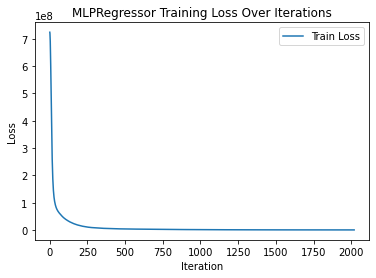

In [11]:
train_loss = model.named_steps['regressor'].loss_curve_

# Plot the training loss
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.title('MLPRegressor Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.savefig(os.path.join(PATH_PLOTS, 'MLPRegressor_training_loss_over_iterations.png'))
plt.show()

### Test on validation

In [12]:
predictions = model.predict(X_valid)

mae = mean_absolute_error(y_valid, predictions)
print("The MAE score of the model on validation data is: " + str(mae))

mse = mean_squared_error(y_valid, predictions)
print("The MSE score of the model on validation data is: " + str(mse))

rmse = mean_squared_error(y_valid, predictions, squared=False)
print("The RMSE score of the model on validation data is: " + str(rmse))


with open(os.path.join(PATH_PLOTS, "Logs.txt"), "w") as file:
    file.write("The MAE score of the model on validation data is: " + str(mae) + '\n')
    file.write("The MSE score of the model on validation data is: " + str(mse) + '\n')    
    file.write("The RMSE score of the model on validation data is: " + str(rmse) + '\n')    

The MAE score of the model on validation data is: 1878.798219550693
The MSE score of the model on validation data is: 55083149.272289485
The RMSE score of the model on validation data is: 7421.802292724422


### Plots

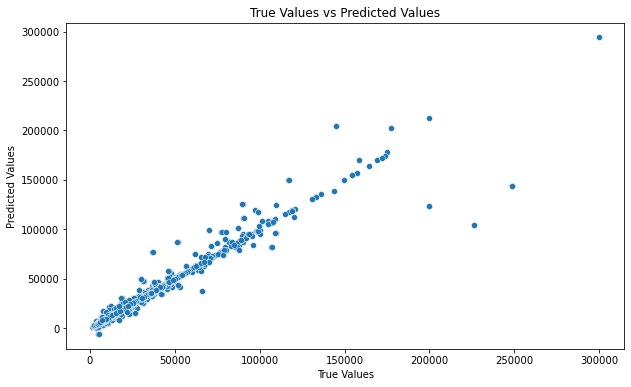

In [13]:
# Create a scatter plot of true values vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_valid, y=predictions)
plt.title('True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.savefig(os.path.join(PATH_PLOTS, 'True_vs_predicted_plot.png'))
plt.show()

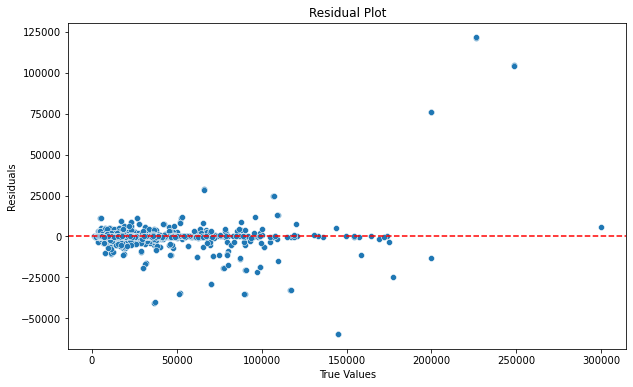

In [14]:
# Create a residual plot to analyze errors
residuals = y_valid - predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_valid, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.savefig(os.path.join(PATH_PLOTS, 'Residual_plot.png'))
plt.show()